<a href="https://colab.research.google.com/github/LucasR2D2S/churn_prediction/blob/main/notebooks/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📉 Customer Churn Prediction
Predicting customer churn using logistic regression and the Telco dataset.

In [ ]:
This notebook demonstrates how to predict customer churn using a supervised machine learning model (logistic regression). We use the Telco Customer Churn dataset and walk through a complete ML workflow: data loading, preprocessing, model training, and evaluation.

In [ ]:
# Install required packages if not available
!pip install scikit-learn pandas matplotlib seaborn --quiet

In [11]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Leitura

# URL dos dados no github
url = 'https://raw.githubusercontent.com/LucasR2D2S/churn_prediction/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Ler o arquivo em pedaços menores
chunks = pd.read_csv(url, chunksize=10000)

# Concatenar todos os pedaços em um único dataframe
df = pd.concat(chunks)

# Exibir as primeiras linhas do dataframe resultante
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)

In [16]:
# Encoding de variáveis categóricas
for col in df.select_dtypes(include='object'):
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[883 153]
 [157 216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



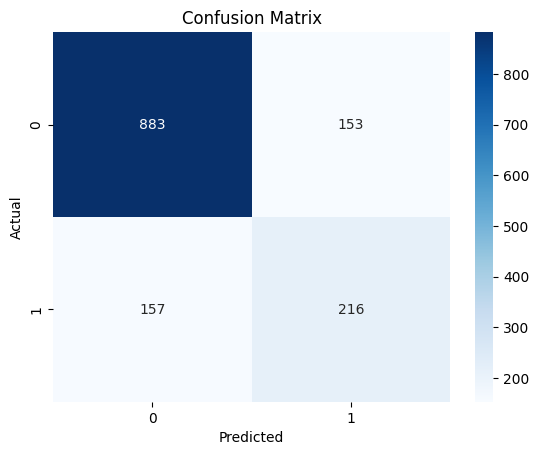

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
### ✅ Conclusions

- Logistic Regression reached ~80% accuracy in predicting customer churn.
- Main preprocessing steps: label encoding, one-hot encoding, scaling.
- This approach can be improved with more advanced models, feature engineering, or hyperparameter tuning.

This project demonstrates a full ML pipeline suitable for production prototyping or portfolio use.

SyntaxError: invalid syntax (<ipython-input-21-4f5ac6ceb4c4>, line 3)